In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras

In [2]:
print(tf.__version__)

2.7.0


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

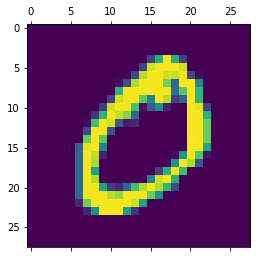

In [5]:
X_train[0].shape
plt.matshow(X_train[1])

In [6]:
X_max = np.amax(X_train)
X_max
X_train = X_train/X_max
X_test = X_test/X_max

In [7]:
X_train_flatten = np.reshape(X_train, (len(X_train),28*28))
X_test_flatten = np.reshape(X_test, (len(X_test),28*28))

In [8]:
X_test_flatten[0].shape

(784,)

In [26]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train_flatten, y_train, epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 1s 323us/step - loss: 0.4723 - accuracy: 0.8760
Epoch 2/5
1875/1875 [==============================] - 1s 334us/step - loss: 0.3039 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 1s 329us/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 1s 330us/step - loss: 0.2732 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 1s 329us/step - loss: 0.2665 - accuracy: 0.9257


In [10]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 276us/step - loss: 0.2864 - accuracy: 0.9214


[0.2863837778568268, 0.9214000105857849]

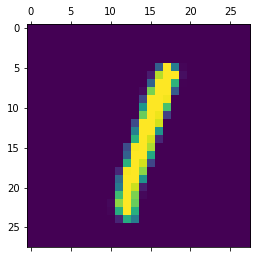

In [17]:
plt.matshow(X_test[5])

In [14]:
y_pred = model.predict(X_test_flatten)

In [18]:
y_pred[5] #Scores for all 10 outputs
print(np.argmax(y_pred[5])) #Get output as digit with max score

1


In [21]:
y_pred[0]

array([8.3875954e-02, 1.6729358e-05, 1.2959236e-01, 9.1914439e-01,
       7.5149238e-03, 9.3626827e-02, 7.7482393e-05, 9.9957711e-01,
       9.2083484e-02, 7.1753377e-01], dtype=float32)

In [24]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[0]

7

In [25]:
tf.math.confusion_matrix(y_test, y_pred_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    0,    1,    0,    3,    5,    3,    1,    0],
       [   0, 1110,    2,    2,    1,    2,    4,    2,   12,    0],
       [  13,    6,  912,   17,   12,    1,   13,   10,   41,    7],
       [   4,    1,   16,  924,    0,   26,    2,    9,   15,   13],
       [   2,    1,    2,    1,  916,    0,   12,    2,    7,   39],
       [  11,    2,    3,   37,    9,  775,   19,    4,   24,    8],
       [  14,    3,    5,    2,    8,    9,  914,    2,    1,    0],
       [   1,    8,   24,    9,    7,    0,    0,  936,    2,   41],
       [  12,    7,    6,   34,   10,   29,   11,   11,  835,   19],
       [  11,    6,    1,   13,   28,    9,    0,   13,    3,  925]],
      dtype=int32)>